Author: Carlos Roberto de Melo

Date: 06/21/2020

Obj: Construir o modelo JAM axisymmetric com base no modelo fotométrico do MGE e dos dados de cinemática do pPXF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jampy.legacy.jam_axi_rms import jam_axi_rms
from plotbin.sauron_colormap import register_sauron_colormap
from plotbin.plot_velfield import plot_velfield
from jampy.legacy.jam_axi_rms import jam_axi_rms

In [2]:
#Primeiro lemos os dados do pPXF,MGE da fotometria e MGE DM.
y_px, x_px, vel,  disp, chi, sigma_disp = np.loadtxt('Output_Ppxf Second Run.txt', unpack=True) #pPXF
surf_mge, sigma_mge, qObs_mge = np.loadtxt('JAM Input.txt', unpack=True) #Fotometria
pot_DM, sigma_DM, qObs_DM = np.loadtxt('pseudo-DM Input.txt', unpack=True) #DM

In [3]:
#O JAM assume que a galáxia esteja com o seu semi-eixo maior sobre o eixo dos x, bem como o centro no ponto (0,0).
    #Por esse motivo vamos transladar as posições de modo que o centro seja o px com maior dispersão. E depois 
    #vamos rotacionar a galáxia para obter o semi-eixo maior sobre o eixo dos x. Como o find my galaxy retorna o
    #P.A (Position Angle) medido no sentido antihorário a partir do eixo y, precisamos rotacionar os nossos eixos
    #originais de 90°+P.A, para que o semi-eixo maior fique sobre o eixo x. No nosso caso, o P.A retornado é 67.7°

theta = 360-22.3        #ângulo de rotação em graus

#Transalação para que o centro seja o px (0,0)
x_new = x_px - 9.5
y_new = y_px - 9.5

#Rotação
x_rot = ( np.cos(theta*np.pi/180)*x_new + np.sin(theta*np.pi/180)*y_new )
y_rot = ( -np.sin(theta*np.pi/180)*x_new + np.cos(theta*np.pi/180)*y_new )

In [4]:
#Esse bloco não é necessário. Ele apenas verifica se a maior dispersão após a translação se encontra na posição (0,0)
#Além disso, olhamos também para ver se essa posição é mantida após a rotação
print("     x_px   y_px   disp \t   x_new   y_new   disp \t   x_rot   y_rot   disp")

for i in range(len(disp)):
    print("%8.2f%8.2f%8.2f\t%8.2f%8.2f%8.2f\t%8.2f%8.2f%8.2f" % (x_px[i],y_px[i], disp[i],x_new[i],y_new[i],disp[i],x_rot[i],y_rot[i],disp[i]))

     x_px   y_px   disp 	   x_new   y_new   disp 	   x_rot   y_rot   disp
    0.00    0.00  303.61	   -9.50   -9.50  303.61	   -5.18  -12.39  303.61
    1.00    0.00  243.74	   -8.50   -9.50  243.74	   -4.26  -12.01  243.74
    2.00    0.00  392.32	   -7.50   -9.50  392.32	   -3.33  -11.64  392.32
    3.00    0.00  320.58	   -6.50   -9.50  320.58	   -2.41  -11.26  320.58
    4.00    0.00  304.89	   -5.50   -9.50  304.89	   -1.48  -10.88  304.89
    5.00    0.00  293.97	   -4.50   -9.50  293.97	   -0.56  -10.50  293.97
    6.00    0.00  279.72	   -3.50   -9.50  279.72	    0.37  -10.12  279.72
    7.00    0.00  315.84	   -2.50   -9.50  315.84	    1.29   -9.74  315.84
    8.00    0.00  317.13	   -1.50   -9.50  317.13	    2.22   -9.36  317.13
    9.00    0.00  333.10	   -0.50   -9.50  333.10	    3.14   -8.98  333.10
   10.00    0.00  254.56	    0.50   -9.50  254.56	    4.07   -8.60  254.56
   11.00    0.00  307.48	    1.50   -9.50  307.48	    4.99   -8.22  307.48
   12.00    0.00  297.40	 

In [35]:
#Este bloco serve para separarmos apenas os px's internos a um certo raio. Isso leva em conta a elipticidade da galáxia
#Onde fica definido o r nós multiplicamos o valor em px de cada posição por 0.6 pois essa é a px scale, de modo que r tem unidade de arcsec.

x_good = []
y_good = []
disp_good = []
sigma_good = []

for i in range(len(disp)):
    r = np.sqrt((x_rot[i]*0.6)**2 + ((y_rot[i])*0.6/(1-0.24))**2)
    if r < 5:
        x_good.append(x_rot[i])
        y_good.append(y_rot[i])
        disp_good.append(disp[i])
        sigma_good.append(sigma_disp[i])

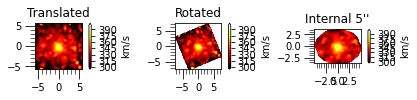

In [6]:
#Plotando o resultado da rotação e a imagem apenas transladada
plt.subplot(131)
plot_velfield(x_new*0.6, y_new*0.6, disp, vmin=300, vmax=400, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)
plt.title(r"Translated")

plt.subplot(132)
plot_velfield(x_rot*0.6, y_rot*0.6, disp,vmin=300, vmax=400, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)
plt.title(r"Rotated")

plt.subplot(133)
plot_velfield(np.array(x_good)*0.6, np.array(y_good)*0.6, disp_good,vmin=300, vmax=400, colorbar=True, label='km/s', cmap=plt.cm.hot, nodots=True)
plt.title(r"Internal 5''")

plt.tick_params(labelleft=True)
plt.subplots_adjust(wspace=1.5)

plt.savefig('/home/carlos/Desktop/ESO325 MGE and JAM/Images/Comparação Original-Rotacionada.png', fmt='png', dpi=1200)

jam_axi_rms elapsed time sec: 0.64
inc=120.0 beta_z=-0.60 M/L=1 BH=7.00e+09 chi2/DOF=9.87
Total mass MGE: 4.298e+11


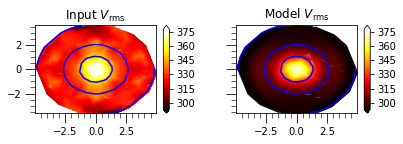

In [42]:
#Aqui é onde realmente é feito o ajuste pelo Jampy

#Definindo os parâmetros do pPXF
xbin = np.array(x_good)*0.6
ybin = np.array(y_good)*0.6

inc = 120.                                           #Assumed galaxy inclination                  
r = np.sqrt(xbin**2 + (ybin/(1-0.24))**2)           #Radius in the plane of the disk
rms = np.sqrt(np.array(disp_good)**2)               #Vrms field in km/s
erms = np.array(sigma_good)                         #1-sigma erro na dispersão

sigmapsf = 0.2420                                   #Sigma psf de onde foram coletados os dados de cinemática, em arcsec
pixsize = 0.6                                       #pixel scale, em px/arcsec, dos dados de cinemática
goodBins =    (r > 0)                           #Informa quais valores de r são bons para gerar o modelo.

#Parâmetros para o modelo JAM
distance = 127.64                                            #Distance in Mpc
mbh = 7e9                                                #Black hole mass in solar masses
#beta = np.array([0.1,0.91, -0.9, -1.7, 0.43, -0.35, 0.32])   #Anisotropy parameter. One for each gaussian component 
beta = np.array([-0.6, -1.0, 0.34, -3.4, 0.39, -0.31, 0.36])
ml = np.array([9.5, 9.5, 8.5, 3.8, 3.4, 3.2, 2.8])           #Mass-to-light ratio in M_sun/L_sun

#Parâmetros do MGE fotométrico
surf_lum = surf_mge               #surface luminosity das gaussianas da fotometria, em unidades de L_sun/pc²
sigma_lum = sigma_mge             #dispersão de cada gaussiana da fotometria, em arcsec.
qobs_lum = qObs_mge               #axial ratio de cada gaussiana da fotometria.


#Potential
    #Neste bloco começamos a definir as componentes do potencial gravitacional. Em um cenário auto-consistente,
    #surf_pot = surf_lum, sigma_pot = sigma_lum, qobs_pot = qObs_lum. Mas pode-se adicionar uma componente de 
    #matéria escura, de modo que as componentes do potencial terão as gaussianas da fotometria + gaussianas do DM.
    #Neste segundo caso, é necessário transformar os valores de luminosidade das surf_lum em valores de massa,
    #multiplicando cada gaussiana da surf_lum por um valor de ml. Após esse passo, podemos adicionar as componentes
    #de DM ao surf_pot. Quando é setado uma ml anterior, é necessário informar a função jam_axi_rms que ml=1. Isso
    #é necessário pois, caso não seja dado um ml ao chamar a função, ela irá calcular o melhor ml e escalonar a
    #solução da Vrms com base neste valor. Por outro lado, se ao chamar a função setamos ml=1, ela usa esse valor 1
    #para escalonar a solução, o que na prática não muda os resultados.
    
surf_pot = surf_mge*ml         #pico do surface potential de cada gaussiana que contribuí para o potencial, em M_sun/pc².
sigma_pot = sigma_mge            #sigma de cada gaussiana presente no surf_pot, em arcsec.
qobs_pot = qObs_mge              #axial ratio de cada gaussiana do potencial.

#Add mge from DM
    #Uma vez que tenhamos multiplicado as componentes luminosas por ml, agora podemos adicionar as componentes
    #gaussianas do perfil de DM. As unidades são as mesmas que as citadas acima.

surf_pot = np.append(surf_pot, pot_DM)
sigma_pot = np.append(sigma_pot, sigma_DM)
qobs_pot = np.append(qobs_pot, qObs_DM )



#------------------------------------- Chamando a função -----------------------------------------------------#
rmsModel, ml, chi2, flux = jam_axi_rms(
        surf_lum, sigma_lum, qobs_lum, surf_pot, sigma_pot, qobs_pot,
        inc, mbh, distance, xbin, ybin, plot=True, rms=rms, erms=erms, sigmapsf=sigmapsf, goodbins=goodBins,
        beta=beta, pixsize=pixsize, tensor='zz', cmap=plt.cm.hot, colorbar=True, linescolor='b', ml=1, nodots=True)


plt.subplots_adjust(wspace=0.5)
plt.savefig('/home/carlos/Desktop/ESO325 MGE and JAM (07-07-20)/Images/JAM pseudo-NFW.png', fmt='png', dpi=1200)
plt.show()


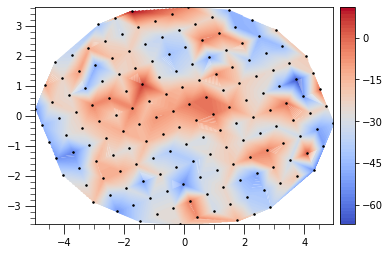

In [43]:
#Aqui apenas plotamos a diferença.

from plotbin.plot_velfield import plot_velfield
residual = rmsModel-rms
plot_velfield(xbin, ybin, residual, colorbar=True, cmap='coolwarm')
plt.plot(xbin[~goodBins], ybin[~goodBins], 'ok', mec='white')
plt.savefig('/home/carlos/Desktop/ESO325 MGE and JAM (07-07-20)/Images/Residuo.png', fmt='png')